In [2]:
import pandas as pd
# _________DON'T EDIT_________
df = pd.read_csv("state_level_daily.csv")

df.head()

,Unnamed: 0,Date,State,Confirmed,Deceased,Recovered,State_Name
0,0,01-Apr-20,AN,0,0,0,Andaman and Nicobar Islands
1,1,01-Apr-20,AP,67,0,1,Andhra Pradesh
2,2,01-Apr-20,AR,0,0,0,Arunachal Pradesh
3,3,01-Apr-20,AS,15,0,0,Assam
4,4,01-Apr-20,BR,3,0,0,Bihar


<AxesSubplot:xlabel='Date'>

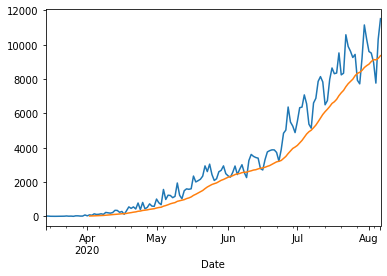

In [4]:
# _________DON'T EDIT_________
df_maha = df.copy()[df["State"] == "MH"]
df_maha["Date"] = pd.to_datetime(df_maha["Date"])
df_maha.set_index("Date", inplace=True)
df_maha.sort_index(inplace=True)
df_maha["Confirmed"].plot()
df_maha["Confirmed"].rolling(20).mean().plot()

In [3]:
# _________DON'T EDIT_________
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df.sort_index(inplace=True)
df.drop(["Unnamed: 0"], axis=1, inplace=True)

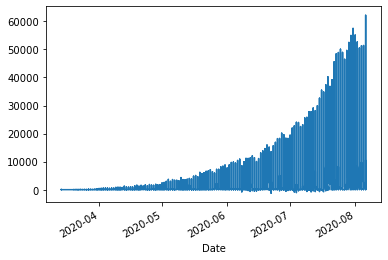

In [4]:
df["Confirmed"].plot()

In [5]:
df.head()

,State,Confirmed,Deceased,Recovered,State_Name
Date,,,,,
2020-03-14,AP,1,0,0,Andhra Pradesh
2020-03-14,LA,0,0,0,Ladakh
2020-03-14,KL,19,0,3,Kerala
2020-03-14,KA,6,1,0,Karnataka
2020-03-14,JK,2,0,0,Jammu and Kashmir


In [6]:
Population = {
'Uttar Pradesh': 199812341, 'Maharashtra': 112374333, 'Bihar': 104099452, 'West Bengal': 91276115, 'Madhya Pradesh': 72626809,
 'Tamil Nadu': 72147030, 'Rajasthan': 68548437, 'Karnataka': 61095297, 'Gujarat': 60439692, 'Andhra Pradesh': 49577103,
 'Odisha': 41974218, 'Telangana': 35003674, 'Kerala': 33406061, 'Jharkhand': 32988134, 'Assam': 31205576,
 'Punjab': 27743338, 'Chhattisgarh': 25545198, 'Haryana': 25351462, 'Uttarakhand': 10086292, 'Himachal Pradesh': 6864602,
 'Tripura': 3673917, 'Meghalaya': 2966889, 'Manipur': 2570390, 'Nagaland': 1978502, 'Goa': 1458545, 'Arunachal Pradesh': 1383727,
 'Mizoram': 1097206, 'Sikkim': 610577, 'Delhi': 16787941, 'Jammu and Kashmir': 12267032, 'Puducherry': 1247953,
 'Chandigarh': 1055450, 'Dadra and Nagar Haveli and Daman and Diu': 585764, 'Andaman and Nicobar Islands': 380581,
 'Ladakh': 274000, 'Lakshadweep': 64473, 'Total': 1380004385
}

In [7]:
for i in df.State_Name.unique():
    if i not in Population:
        print(i)
for j in Population:
    if j not in df.State_Name.unique():
        print(j)

Daman and Diu
State Unassigned


In [8]:
# _________DON'T EDIT_________
import math

df["Population"] = df.apply(lambda x: Population[x.State_Name] if x.State_Name in Population else math.nan, axis=1)

In [9]:
df[df["State_Name"] == "Daman and Diu"].tail()

,State,Confirmed,Deceased,Recovered,State_Name,Population
Date,,,,,,
2020-08-02,DD,0,0,0,Daman and Diu,NaN
2020-08-03,DD,0,0,0,Daman and Diu,NaN
2020-08-04,DD,0,0,0,Daman and Diu,NaN
2020-08-05,DD,0,0,0,Daman and Diu,NaN
2020-08-06,DD,0,0,0,Daman and Diu,NaN


In [10]:
# _________DON'T EDIT_________
df.dropna(inplace=True)

,State,Confirmed,Deceased,Recovered,State_Name,Population
Date,,,,,,
2020-03-14,TT,81,2,9,Total,1.380004e+09
2020-03-15,TT,27,0,4,Total,1.380004e+09
2020-03-16,TT,15,0,1,Total,1.380004e+09
2020-03-17,TT,11,1,1,Total,1.380004e+09
2020-03-18,TT,37,0,0,Total,1.380004e+09


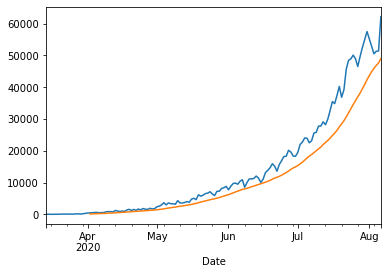

In [11]:
#_________DON'T EDIT_________
df_total = df.copy()[df["State_Name"] == "Total"]
df_total["Confirmed"].plot()
df_total["Confirmed"].rolling(20).mean().plot()
df_total.head()

In [23]:
Rural_Population = {
 'Uttar Pradesh': 155317278, 'Maharashtra': 61556074, 'Bihar': 92341436, 'West Bengal': 62183113, 'Madhya Pradesh': 52557404,
 'Tamil Nadu': 37229590, 'Rajasthan': 51500352, 'Karnataka': 37469335, 'Gujarat': 34694609, 'Andhra Pradesh': 34966693,
 'Odisha': 34970562, 'Telangana': 21395009, 'Kerala': 17471135, 'Jharkhand': 25055073, 'Assam': 26807034, 'Punjab': 17344192,
 'Chhattisgarh': 19607961, 'Haryana': 16509359, 'Uttarakhand': 7036954, 'Himachal Pradesh': 6176050, 'Tripura': 2712464,
 'Meghalaya': 2371439, 'Manipur': 1793875, 'Nagaland': 1407536, 'Goa': 551731, 'Arunachal Pradesh': 1066358, 'Mizoram': 525435,
 'Sikkim': 456999, 'Delhi': 419042, 'Jammu and Kashmir': 9064220, 'Puducherry': 395200, 'Chandigarh': 28991,
 'Dadra and Nagar Haveli and Daman and Diu': 243510, 'Andaman and Nicobar Islands': 237093, 'Ladakh': 43840, 'Lakshadweep': 14141
}

In [24]:
Urban_Population = {
'Uttar Pradesh': 44495063, 'Maharashtra': 50818259, 'Bihar': 11758016, 'West Bengal': 29093002, 'Madhya Pradesh': 20069405,
 'Tamil Nadu': 34917440, 'Rajasthan': 17048085, 'Karnataka': 23625962, 'Gujarat': 25745083, 'Andhra Pradesh': 14610410,
 'Odisha': 7003656, 'Telangana': 13608665, 'Kerala': 15934926, 'Jharkhand': 7933061, 'Assam': 4398542, 'Punjab': 10399146,
 'Chhattisgarh': 5937237, 'Haryana': 8842103, 'Uttarakhand': 3049338, 'Himachal Pradesh': 688552, 'Tripura': 961453,
 'Meghalaya': 595450, 'Manipur': 776515, 'Nagaland': 570966, 'Goa': 906814, 'Arunachal Pradesh': 317369, 'Mizoram': 571771,
 'Sikkim': 153578, 'Delhi': 16368899, 'Jammu and Kashmir': 3202812, 'Puducherry': 852753, 'Chandigarh': 1026459,
 'Dadra and Nagar Haveli and Daman and Diu': 342254, 'Andaman and Nicobar Islands': 143488, 'Ladakh': 230160, 'Lakshadweep': 50332
}


In [25]:
# _________DON'T EDIT_________
df["Rural Population"] = df.apply(lambda x: Rural_Population[x.State_Name] if x.State_Name in Rural_Population else math.nan, axis=1)
df["Urban Population"] = df.apply(lambda x: Urban_Population[x.State_Name] if x.State_Name in Urban_Population else math.nan, axis=1)

In [30]:
# _________DON'T EDIT_________
df.dropna(inplace=True)

In [31]:
df.head()

,State,Confirmed,Deceased,Recovered,State_Name,Population,Rural Population,Urban Population
Date,,,,,,,,
2020-03-14,AP,1,0,0,Andhra Pradesh,49577103.0,34966693.0,14610410.0
2020-03-14,LA,0,0,0,Ladakh,274000.0,43840.0,230160.0
2020-03-14,KL,19,0,3,Kerala,33406061.0,17471135.0,15934926.0
2020-03-14,KA,6,1,0,Karnataka,61095297.0,37469335.0,23625962.0
2020-03-14,JK,2,0,0,Jammu and Kashmir,12267032.0,9064220.0,3202812.0


In [32]:
df.to_csv("PreprocessedData.csv")

In [33]:
df_total.to_csv("NationWide.csv")